# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np

# Load data

In [2]:
df = gpd.read_file('raw/trafico.geojson')

In [3]:
df.dtypes

CodigoSeccion            object
Ocupacion                object
Intensidad               object
Velocidad                object
FechaHora        datetime64[ms]
geometry               geometry
dtype: object

In [7]:
df['CodigoSeccion'].unique().size

81

In [8]:
df.FechaHora.unique()

<DatetimeArray>
['2024-12-09 17:50:00', '2018-05-23 10:10:00', '2016-04-11 14:30:00',
 '2023-11-14 13:40:00', '2019-03-05 12:45:00', '2018-06-12 14:00:00',
 '2018-02-22 15:15:00']
Length: 7, dtype: datetime64[ms]

In [4]:
df[df.FechaHora != '2024-12-09 17:50:00']

,CodigoSeccion,Ocupacion,Intensidad,Velocidad,FechaHora,geometry
5,278,0,0,0,2018-05-23 10:10:00,"POLYGON ((-2.95144 43.27286, -2.9512 43.27282,..."
8,281,0,0,0,2016-04-11 14:30:00,"POLYGON ((-2.94139 43.2707, -2.94098 43.26996,..."
9,282,0,0,0,2016-04-11 14:30:00,"POLYGON ((-2.94113 43.27061, -2.94127 43.27074..."
11,284,0,0,0,2018-05-23 10:10:00,"POLYGON ((-2.94829 43.27239, -2.94846 43.27243..."
12,285,0,0,0,2023-11-14 13:40:00,"POLYGON ((-2.92122 43.26554, -2.9222 43.26521,..."
13,286,0,0,0,2023-11-14 13:40:00,"MULTIPOLYGON (((-2.92289 43.26363, -2.92283 43..."
14,287,0,0,0,2019-03-05 12:45:00,"POLYGON ((-2.9343 43.2509, -2.93447 43.25134, ..."
15,288,0,0,0,2019-03-05 12:45:00,"POLYGON ((-2.93477 43.25109, -2.93478 43.25092..."
16,289,0,0,0,2018-06-12 14:00:00,"POLYGON ((-2.93316 43.26759, -2.93317 43.26758..."
17,290,0,0,0,2018-06-12 14:00:00,"POLYGON ((-2.93331 43.26702, -2.93315 43.26742..."


In [9]:
df.Intensidad = df.Intensidad.astype('int')
df = df[df.Intensidad > 0 ]

(-2.9555459427756747, -2.902568292775675, 43.24519753290335, 43.27376244290335)

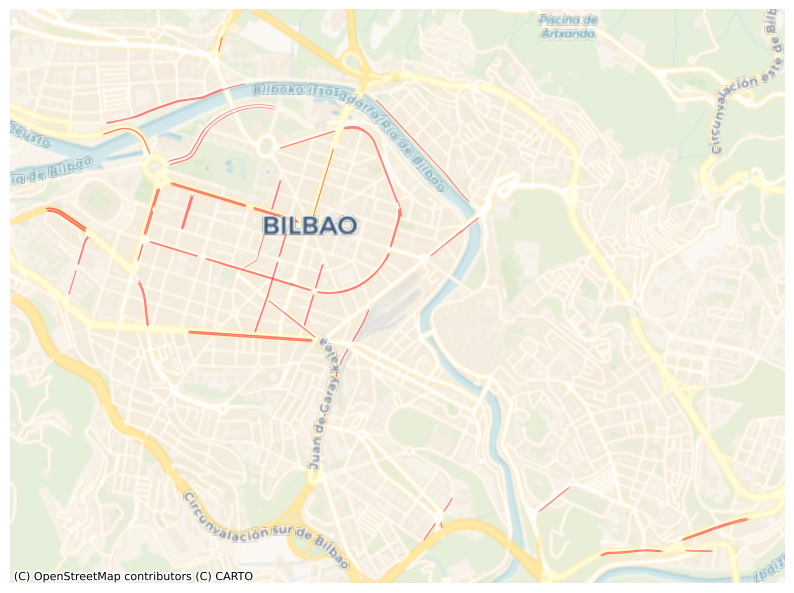

In [11]:
# Plot sensors
import contextily as cx
ax = df.plot(color = 'r', markersize = 10, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')